In [ ]:
import numpy as np
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

#Task 1
csv파일 불러오기 //
 키, 몸무게 데이터 골라내기

In [ ]:
data = pd.read_csv("./p01_input.csv", encoding='cp949')
data = data[['키','몸무게']]
data = data.rename(columns = {'키' : 'height', '몸무게' : 'weight'})
data =data.dropna()

In [ ]:
data 

,height,weight
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5
...,...,...
9681,176.1,50.4
9682,174.1,88.8
9683,169.5,63.2
9684,159.2,52.9


#Task2
키, 몸무게 평균 구하기

In [ ]:
mean_height = data['weight'].mean()
mean_weight = data['height'].mean()
print('키 평균 : ', mean_height)
print('몸무게 평균 ; ', mean_weight)

키 평균 :  50.20759140673406
몸무게 평균 ;  154.56483164635458


#Task3
키, 몸무게 간의 Pearson Correlation Coefficient 구하기

In [ ]:
def pearson_similarity(u1, u2):
    u1_c = u1 - u1.mean()
    u2_c = u2 - u2.mean()
    denom = np.sqrt(np.sum(u1_c**2) * np.sum(u2_c**2))
    if denom != 0:
      return np.sum(u1_c * u2_c) / denom
    else:
      return 0

In [ ]:
h_w_pearson = pearson_similarity(data['height'], data['weight'])
print('키 와 몸무게의 상관관계 :' , h_w_pearson)

키 와 몸무게의 상관관계 : 0.8490058387689018


#Task4
Linear Regression을 사용한 선형관계찾기 // 경사하강법을 이용한 최적화

In [ ]:
height = torch.FloatTensor(data['height'])
weight = torch.FloatTensor(data['weight'])
weight = weight.unsqueeze(1)
height = height.unsqueeze(1)

In [ ]:
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 0.00001
lr2 = 0.7

x_train = height
y_train = weight

for epoch in range(10001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.mm(x_train, W)+ b
    cost = torch.mean((hypothesis - y_train)**2)

    cost.backward()
    
    with torch.no_grad():
      W = W -lr * W.grad
      b = b -lr2 *b.grad

    if epoch %1000  == 0:
      print(f"epoch: {epoch}, cost: {cost.item():.6f}, W: {W.item():.6f}, b: {b.item():.6f}")
      



epoch: 0, cost: 2812.360352, W: 0.160127, b: 70.290619
epoch: 1000, cost: 81.431328, W: 0.843822, b: -80.212608
epoch: 2000, cost: 81.399826, W: 0.854092, b: -81.804878
epoch: 3000, cost: 81.399818, W: 0.854227, b: -81.825935
epoch: 4000, cost: 81.399818, W: 0.854227, b: -81.825935
epoch: 5000, cost: 81.399818, W: 0.854227, b: -81.825935
epoch: 6000, cost: 81.399818, W: 0.854227, b: -81.825935
epoch: 7000, cost: 81.399818, W: 0.854227, b: -81.825935
epoch: 8000, cost: 81.399818, W: 0.854227, b: -81.825935
epoch: 9000, cost: 81.399818, W: 0.854227, b: -81.825935
epoch: 10000, cost: 81.399818, W: 0.854227, b: -81.825935


In [ ]:
print(f"W: {W.item():.6f}, b: {b.item():.6f}")

W: 0.854227, b: -81.825935


#Task5
matplotlib를 사용한 키, 몸무게, 선형관계 표현

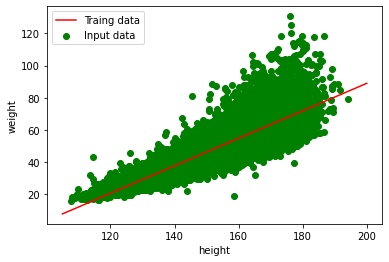

In [ ]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
X = torch.linspace(105,200,100).unsqueeze(1)
Y = torch.torch.mm(X,W)+b
plt.xlabel("height")
plt.ylabel("weight")
plt.plot(X,Y, c='r', label = "Traing data")
plt.scatter(height, weight,c='g', label="Input data")
plt.legend()
plt.show()

In [ ]:
#test
x_test = torch.FloatTensor([[120.]])
print( torch.mm(x_test, W) + b)
x_test = torch.FloatTensor([[180.]])
print( torch.mm(x_test, W) + b)

tensor([[20.6814]])
tensor([[71.9350]])
